In [1]:
#Installing the biopython libraary
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 20.7 MB/s eta 0:00:00


In [2]:
#Performing BLAST search on NCBI database
from Bio.Blast import NCBIWWW, NCBIXML

def perform_blast_search(user_sequence):
    try:
        result_handle = NCBIWWW.qblast("blastp", "nr", user_sequence)

        if result_handle:
            with result_handle as result:
                blast_record = NCBIXML.read(result)
                if blast_record.alignments:
                    for alignment in blast_record.alignments:
                        for hsp in alignment.hsps:
                            print("Query:", hsp.query[:50])
                            print("Match:", hsp.match[:50])
                            print("Subject:", hsp.sbjct[:50])
                else:
                    print("No alignments found in the BLAST result")
        else:
            print("No data received from BLAST search")

    except Exception as e:
        print("An error occurred during BLAST search:", e)

if __name__ == "__main__":
    user_sequence = user_sequence = input("Enter a protein sequence: ")
    perform_blast_search(user_sequence)

Enter a protein sequence: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


/usr/local/lib/python3.10/dist-packages/Bio/Blast/NCBIWWW.py:281: BiopythonWarning: BLAST request AJ1JZ26B013 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Subject: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Subject: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Subject: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Subject: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPA AFVNQHLCGSHLVEALYLVCGERGFFY
Subject: MALWMRLLPLLALLALWGPDPAQAFVNQHLCGSHLVEALYLVCGERGFFY
Query: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY
Match: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERG FY
Subj

In [10]:
#Performing blast search through the swissprot database
from Bio.Blast import NCBIWWW, NCBIXML
from tabulate import tabulate
import textwrap

def wrap_text(text, width=50):
    return "\n".join(textwrap.fill(line, width=width) for line in text.splitlines())

def perform_blast_search(user_sequence):
    try:
        result_handle = NCBIWWW.qblast("blastp", "swissprot", user_sequence)
        if result_handle:
            with result_handle as result:
                blast_record = NCBIXML.read(result)
                if blast_record.alignments:
                    table_data = []
                    for i, alignment in enumerate(blast_record.alignments[:10]):
                        for hsp in alignment.hsps:
                            alignment_data = []
                            alignment_data.append(f"Alignment {i+1}")
                            alignment_data.append(wrap_text(alignment.title))
                            alignment_data.append(alignment.accession)
                            alignment_data.append(wrap_text(hsp.sbjct))
                            alignment_data.append(str(hsp.align_length))
                            alignment_data.append(f"{hsp.expect:.2e}")
                            alignment_data.append(f"{hsp.bits:.2f}")

                            # Calculate percentage identity
                            percentage_identity = (hsp.identities / hsp.align_length) * 100
                            alignment_data.append(f"{percentage_identity:.2f}%")
                            table_data.append(alignment_data)

                    headers = ["Alignment", "Title", "Accession Number", "Subject", "Alignment Length", "E-value", "Bit Score", "Percentage Identity"]
                    output = tabulate(table_data, headers=headers, tablefmt="grid")
                    return output
                else:
                    print("No alignments found in the BLAST result")
        else:
            print("No data received from BLAST search")

    except Exception as e:
        print("An error occurred during BLAST search:", e)

# Example usage:
if __name__ == "__main__":
    user_sequence = input("Enter a protein sequence: ")
    results = perform_blast_search(user_sequence)
    print(results)

Enter a protein sequence: MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN


/usr/local/lib/python3.10/dist-packages/Bio/Blast/NCBIWWW.py:281: BiopythonWarning: BLAST request AJ2MRNE3013 is taking longer than 10 minutes, consider re-issuing it
  warnings.warn(


+--------------+----------------------------------------------------+--------------------+----------------------------------------------------+--------------------+-----------+-------------+-----------------------+
| Alignment    | Title                                              | Accession Number   | Subject                                            |   Alignment Length |   E-value |   Bit Score | Percentage Identity   |
+==============+====================================================+====================+====================================================+====================+===========+=============+=======================+
| Alignment 1  | sp|P01308.1| RecName: Full=Insulin; Contains:      | P01308             | MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFY |                110 |  1.57e-76 |      223.79 | 100.00%               |
|              | RecName: Full=Insulin B chain; Contains: RecName:  |                    | TPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSI

In [32]:
#Converting tabulated output of search into a dataframe
import pandas as pd
import re

#Splitting the table into rows
rows = results.split('\n')

#Initialize lists to store the data
alignment = []
title = []
accession_number = []
subject = []
alignment_length = []
e_value = []
bit_score = []
percentage_identity = []

#Temporary variables for multi-line handling
current_title = ""
current_subject = ""
inside_multiline = False

#Iterating over the rows and extract the data
for i, row in enumerate(rows):
    row = row.strip()

    #Skipping the header and separator rows
    if i == 0 or row.startswith('+') or not row:
        continue

    #Checking if the row starts a new alignment entry
    if row.startswith('| Alignment'):
        if inside_multiline:
            #Saving the current entry before starting a new one
            subject.append(current_subject.strip())
            inside_multiline = False

        #Extracting the data from the row
        columns = [col.strip().strip('|') for col in re.split(r'\s*\|\s*', row) if col.strip()]

        #Skipping rows that don't have enough columns
        if len(columns) < 8:
            continue

        #Appending extracted data to lists
        alignment.append(columns[0])
        title.append(columns[1])
        accession_number.append(columns[2])
        current_subject = columns[3]
        alignment_length.append(columns[4])
        e_value.append(columns[5])
        bit_score.append(columns[6])
        percentage_identity.append(columns[7])

        inside_multiline = True
    else:
        # Append the subject line continuation
        if inside_multiline:
            current_subject += " " + row.strip().strip('|')

# Ensure the last alignment entry is added
if inside_multiline:
    subject.append(current_subject.strip())

# Create a DataFrame from the data
df = pd.DataFrame({
    'Alignment': alignment,
    'Title': title,
    'Accession Number': accession_number,
    'Subject': subject,
    'Alignment Length': alignment_length,
    'E-value': e_value,
    'Bit Score': bit_score,
    'Percentage Identity': percentage_identity
})

# Print the resulting DataFrame
df = df.drop(df.index[0])

df.head()

,Alignment,Title,Accession Number,Subject,Alignment Length,E-value,Bit Score,Percentage Identity
1,Alignment 1,sp,P01308.1,RecName: Full=Insulin; Contains: ...,P01308,MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGER...,110,1.57e-76
2,Alignment 2,sp,Q8HXV2.1,RecName: Full=Insulin; Contains: ...,Q8HXV2,MALWMRLLPLLALLALWGPDPAQAFVNQHLCGSHLVEALYLVCGER...,110,7.44e-76
3,Alignment 3,sp,P30410.1,RecName: Full=Insulin; Contains: ...,P30410,MALWMRLLPLLVLLALWGPDPASAFVNQHLCGSHLVEALYLVCGER...,110,1.12e-75
4,Alignment 4,sp,P30406.1,RecName: Full=Insulin; Contains: ...,P30406,MALWMRLLPLLALLALWGPDPAPAFVNQHLCGSHLVEALYLVCGER...,110,1.13e-74
5,Alignment 5,sp,P30407.1,RecName: Full=Insulin; Contains: ...,P30407,MALWMRLLPLLALLALWGPDPVPAFVNQHLCGSHLVEALYLVCGER...,110,3.92e-74


In [28]:
#Performing blast search
from Bio.Blast import NCBIWWW, NCBIXML
import textwrap
import pandas as pd

def wrap_text(text, width=50):
    return "\n".join(textwrap.fill(line, width=width) for line in text.splitlines())

def perform_blast_search(user_sequence):
    try:
        result_handle = NCBIWWW.qblast("blastp", "nr", user_sequence)
        if result_handle:
            with result_handle as result:
                blast_record = NCBIXML.read(result)
                if blast_record.alignments:
                    table_data = []
                    for i, alignment in enumerate(blast_record.alignments[:10]):
                        for hsp in alignment.hsps:
                            alignment_data = []
                            alignment_data.append(f"Alignment {i+1}")
                            alignment_data.append(wrap_text(alignment.title))
                            alignment_data.append(alignment.accession)
                            alignment_data.append(hsp.sbjct)
                            alignment_data.append(str(hsp.align_length))
                            alignment_data.append(f"{hsp.expect:.2e}")
                            alignment_data.append(f"{hsp.bits:.2f}")

                            percentage_identity = (hsp.identities / hsp.align_length) * 100
                            alignment_data.append(f"{percentage_identity:.2f}%")
                            table_data.append(alignment_data)

                    #Creating a DataFrame instead of tabulated format
                    df = pd.DataFrame(table_data, columns=[
                        "Alignment", "Title", "Accession Number", "Subject",
                        "Alignment Length", "E-value", "Bit Score", "Percentage Identity"
                    ])

                    return df
                else:
                    print("No alignments found in the BLAST result")
        else:
            print("No data received from BLAST search")

    except Exception as e:
        print("An error occurred during BLAST search:", e)

if __name__ == "__main__":
    user_sequence = input("Enter a protein sequence: ")
    results_df = perform_blast_search(user_sequence)
results_df.head()

,Alignment,Title,Accession Number,Subject,Alignment Length,E-value,Bit Score,Percentage Identity
0,Alignment 1,"ref|NP_648775.1| argonaute 2, isoform B\n[Dros...",NP_648775,MGKKDKNKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQP...,1214,0.00e+00,2456.02,99.84%
1,Alignment 2,gb|AAO39550.1| RE04347p [Drosophila melanogaster],AAO39550,MGKKDKNKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQP...,1214,0.00e+00,2452.94,99.75%
2,Alignment 3,"ref|NP_730054.1| argonaute 2, isoform C\n[Dros...",NP_730054,ENKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQPQQLQQ...,1209,0.00e+00,2446.39,99.75%
3,Alignment 4,"gb|ABB54720.1| Argonaute-2, partial [Drosophil...",ABB54720,QSQGQYQSRGPPQQQQAAPLPLPPQPAGSIKRGTIGKPGQVGINYL...,839,0.00e+00,1762.27,99.40%
4,Alignment 5,"gb|ABB54719.1| Argonaute-2, partial [Drosophil...",ABB54719,QSQGQYQSRGPPQQQQAAPLPLPPQPAGSIKRGTIGKPGQVGINYL...,839,0.00e+00,1762.27,99.40%


In [29]:
#Filtering out the output and saving it into a list
columns_to_drop = ['Alignment', 'Title', 'Accession Number']
results_df = results_df.drop(columns=[col for col in columns_to_drop if col in results_df.columns])

def filter_and_extract_subjects(results_df, min_identity=30, max_evalue=1e-5):
    df = results_df.copy()
    df['Percentage Identity'] = df['Percentage Identity'].str.replace('%', '').astype(float)

    if 'E-value' in df.columns:
        df['E-value'] = df['E-value'].astype(float)

    filtered_df = df[(df['Percentage Identity'] >= min_identity) &
                     (df['E-value'] <= max_evalue)]

    subjects = filtered_df['Subject'].tolist()

    return subjects

sequence = filter_and_extract_subjects(results_df)
print(sequence)

['MGKKDKNKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQPQQLQQPQQQQQQQPHQQQQQSSRQQPSTSSGGSRASGFQQGGQQQKSQDAEGWTAQKKQGKQQVQGWTKQGQQGGHQQGRQGQDGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHEQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQPNQTQSQGQYQSRGPPQQQQAAPLPLPPQPAGSIKRGTIGKPGQVGINYLDLDLSKMPSVAYHYDVKIMPERPKKFYRQAFEQFRVDQLGGAVLAYDGKASCYSVDKLPLNSQNPEVTVTDRNGRTLRYTIEIKETGDSTIDLKSLTTYMNDRIFDKPMRAMQCVEVVLASPCHNKAIRVGRSFFKMSDPNNRHELDDGYEALVGLYQAFMLGDRPFLNVDISHKSFPISMPMIEYLERFSLKAKINNTTNLDYSRRFLEPFLRGINVVYTPPQSFQSAPRVYRVNGLSRAPASSETFEHDGKKVTIASYFHSRNYPLKFPQLHCLNVGSSIKSILLPIELCSIEEGQALNRKDGATQVANMIKYAATSTNVRKRKIMNLLQYFQHNLDPTISRFGIRIANDFIVVSTRVLSPPQVEYHSKRFTMVKNGSWRMDGMKFLEPKPKAHKCAVLYCDPRSGRKMNYTQLNDFGNLIISQGKAVNISLDSDVTYRPFTDDERSLDTIFADLKRSQHDLAIVIIPQFRISYDTIKQKAELQHGILTQCIKQFTVERKCNNQTIGNILLKINSKLNGINHKIKDDPRLPMMKNTMYIGADVTHPSPDQREIPSVVGVAASHDPYGASYNMQYR

In [30]:
#Creating set of SeqRecord objects
sequences = [SeqRecord(Seq(seq), id=f"seq{i}") for i, seq in enumerate(sequence)]

for record in sequences:
    print(f"ID: {record.id}")
    print(f"Sequence: {str(record.seq)}")
    print()

ID: seq0
Sequence: MGKKDKNKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQPQQLQQPQQQQQQQPHQQQQQSSRQQPSTSSGGSRASGFQQGGQQQKSQDAEGWTAQKKQGKQQVQGWTKQGQQGGHQQGRQGQDGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHEQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQPNQTQSQGQYQSRGPPQQQQAAPLPLPPQPAGSIKRGTIGKPGQVGINYLDLDLSKMPSVAYHYDVKIMPERPKKFYRQAFEQFRVDQLGGAVLAYDGKASCYSVDKLPLNSQNPEVTVTDRNGRTLRYTIEIKETGDSTIDLKSLTTYMNDRIFDKPMRAMQCVEVVLASPCHNKAIRVGRSFFKMSDPNNRHELDDGYEALVGLYQAFMLGDRPFLNVDISHKSFPISMPMIEYLERFSLKAKINNTTNLDYSRRFLEPFLRGINVVYTPPQSFQSAPRVYRVNGLSRAPASSETFEHDGKKVTIASYFHSRNYPLKFPQLHCLNVGSSIKSILLPIELCSIEEGQALNRKDGATQVANMIKYAATSTNVRKRKIMNLLQYFQHNLDPTISRFGIRIANDFIVVSTRVLSPPQVEYHSKRFTMVKNGSWRMDGMKFLEPKPKAHKCAVLYCDPRSGRKMNYTQLNDFGNLIISQGKAVNISLDSDVTYRPFTDDERSLDTIFADLKRSQHDLAIVIIPQFRISYDTIKQKAELQHGILTQCIKQFTVERKCNNQTIGNILLKINSKLNGINHKIKDDPRLPMMKNTMYIGADVTHPSPDQREIPSVVG

In [3]:
#Checking the best scoring matrix for Multiple sequence alignment
from Bio.Align import PairwiseAligner
from Bio.Align import substitution_matrices

class SequenceAligner:
    def __init__(self):
        self.aligner = PairwiseAligner()
        self.aligner.mode = 'global'
        self.aligner.open_gap_score = -10
        self.aligner.extend_gap_score = -0.5

    def align_with_pam(self, seq1, seq2):
        self.aligner.substitution_matrix = substitution_matrices.load("PAM250")
        alignments = self.aligner.align(seq1, seq2)
        return alignments

    def align_with_blosum(self, seq1, seq2):
        self.aligner.substitution_matrix = substitution_matrices.load("BLOSUM62")
        alignments = self.aligner.align(seq1, seq2)
        return alignments

    def print_alignments(self, alignments):
        for alignment in alignments:
            print(alignment)

if __name__ == "__main__":
    aligner = SequenceAligner()
    seq1 = "MAEGKKLNGKDYKLHLMAGGTFLFLLVAGTFQFPLWVKGRNQDDKGCPKYTGQLSAKDIKHYYNAYRKYKVGETKLTISRRYKTDGKPIYRPPHFHTPFQCGHKKKSIAADILTLSEQTA"
    seq2 = "APLKTFVNGSGHISLTKPEQWKSHLLNKFQSDYKHLLINHAHIECSKRNGSFAFSNAQLSRAFSKLLESGYGSNVDRNTSQPVDPKGTRVPRMLKRSSAYIHPDRDDQMILDDFIRTLPGS"

    print("Alignments using PAM250 substitution matrix:")
    pam_alignments = aligner.align_with_pam(seq1, seq2)
    aligner.print_alignments(pam_alignments)

    print("Alignments using BLOSUM62 substitution matrix:")
    blosum_alignments = aligner.align_with_blosum(seq1, seq2)
    aligner.print_alignments(blosum_alignments)

Alignments using PAM250 substitution matrix:
target            0 MAEGKKLNG---------KDYKLHLMA--GGTFLFLLVAGTFQFPLWVKGRNQDDKGCPK
                  0 .......||---------...|.||..--......||.-------------|.....|.|
query             0 APLKTFVNGSGHISLTKPEQWKSHLLNKFQSDYKHLLI-------------NHAHIECSK

target           49 YTG--QLSAKDIKHYY-----NAYRKYKVGETKLTISRRYKTDGKPIYRPPHFHTPFQCG
                 60 ..|--..|........-----..|.......|................|......|---.
query            47 RNGSFAFSNAQLSRAFSKLLESGYGSNVDRNTSQPVDPKGTRVPRMLKRSSAYIHP---D

target          102 HKKKSIAADIL-TLSEQTA 120
                120 .....|..|..-||.--.. 139
query           104 RDDQMILDDFIRTLP--GS 121

target            0 MAEGKKLNGK---------DYKLHLMA--GGTFLFLLVAGTFQFPLWVKGRNQDDKGCPK
                  0 .......||.---------..|.||..--......||.-------------|.....|.|
query             0 APLKTFVNGSGHISLTKPEQWKSHLLNKFQSDYKHLLI-------------NHAHIECSK

target           49 YTG--QLSAKDIKHYY-----NAYRKYKVGETKLTISRRYKTDGKPIYRPPHFHTPFQCG
         

In [4]:
#Installing the MAFFT algorithm for multiple sequence alignment
!apt-get update
!apt-get install -y mafft

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,219 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,393 kB]
Get:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Hit:14 https://pp

In [31]:
#Perfroming the multiple sequence alignment on the list created from dataframe
import subprocess
from Bio import AlignIO, SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

#Writing the list sequences to a file in FASTA format
with open("input.fasta", "w") as file:
    SeqIO.write(sequences, file, format="fasta")

#Running the MAFFT directly using subprocess
result = subprocess.run(["mafft", "input.fasta"], capture_output=True, text=True)

#Checking for errors
if result.returncode != 0:
    raise RuntimeError(f"MAFFT error: {result.stderr}")

#Saving the result to a file
with open("aligned.fasta", "w") as file:
    file.write(result.stdout)

#Reading the aligned sequence
alignment = AlignIO.read("aligned.fasta", "fasta")
for record in alignment:
    print(f">{record.id}")
    print(record.seq)

>seq0
MGKKDKNKKGGQDSAAAPQPQQQQKQQQQRQQQPQQLQQPQQLQQPQQLQQPQQQQQQQPHQQQQQSSRQQPSTSSGGSRASGFQQGGQQQKSQDAEGWTAQKKQGKQQVQGWTKQGQQGGHQQGRQGQDGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHQQGRQGQEGGYQQRPPGQQQGGHEQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPSGQQQGGHQQGRQGQEGGYQQRPPGQQPNQTQSQGQYQSRGPPQQQQAAPLPLPPQPAGSIKRGTIGKPGQVGINYLDLDLSKMPSVAYHYDVKIMPERPKKFYRQAFEQFRVDQLGGAVLAYDGKASCYSVDKLPLNSQNPEVTVTDRNGRTLRYTIEIKETGDSTIDLKSLTTYMNDRIFDKPMRAMQCVEVVLASPCHNKAIRVGRSFFKMSDPNNRHELDDGYEALVGLYQAFMLGDRPFLNVDISHKSFPISMPMIEYLERFSLKAKINNTTNLDYSRRFLEPFLRGINVVYTPPQSFQSAPRVYRVNGLSRAPASSETFEHDGKKVTIASYFHSRNYPLKFPQLHCLNVGSSIKSILLPIELCSIEEGQALNRKDGATQVANMIKYAATSTNVRKRKIMNLLQYFQHNLDPTISRFGIRIANDFIVVSTRVLSPPQVEYHSKRFTMVKNGSWRMDGMKFLEPKPKAHKCAVLYCDPRSGRKMNYTQLNDFGNLIISQGKAVNISLDSDVTYRPFTDDERSLDTIFADLKRSQHDLAIVIIPQFRISYDTIKQKAELQHGILTQCIKQFTVERKCNNQTIGNILLKINSKLNGINHKIKDDPRLPMMKNTMYIGADVTHPSPDQREIPSVVGVAASHDPYGASYN

In [18]:
#Performing MSA without the specific sequences listed
import subprocess
from Bio import AlignIO, SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment

#Defining the sequences for MSA
sequences = [
    SeqRecord(Seq("MALWMRLLPLLALLALWGPDPAQAFVNQHLCGSHLVEALYLVCGERGFFY"), id="seq0"),
    SeqRecord(Seq("MALWMRLLPLLALLALWAPAPTRAFVNQHLCGSHLVEALYLVCGERGFFYAWEFFFAAAYI"), id="seq1"),
    SeqRecord(Seq("APLKTFVNGSGHISLTKPEQWKSHLLNKFQSDYKLLLINHAHIECSKRNGSFAFSNAQLSRAFSKLLESGYGSNVDRNTSQPVDPKGTRVPRMLKRSSAYIHPDRDDQMILDDFIRTLPGS"), id="seq2"),
    SeqRecord(Seq("MAEGKKLNGKDYKLHLMAGGTFLFLLVAGTFQFPLWVKGRNQDDKGCPKYTGQLSAKDIKHYYNAYRKYKVGETKLTISRRYKTDGKPIYRPPHFHTPFQCGHKKKSIAADILTLSEQTA"), id="seq3"),
    SeqRecord(Seq("MALWMHLLPLLALLALWGPEPAPAFVNQHLCGPHLVEALYLVCGERGFFY"), id="seq4")
]

with open("input.fasta", "w") as file:
    SeqIO.write(sequences, file, format="fasta")

try:
    result = subprocess.run(["mafft", "--auto", "--thread", "-1", "input.fasta"], capture_output=True, text=True, check=True)
except subprocess.CalledProcessError as e:
    print(f"MAFFT error: {e}")
    exit(1)

with open("aligned.fasta", "w") as file:
    file.write(result.stdout)

alignment = AlignIO.read("aligned.fasta", "fasta")
for record in alignment:
    print(f">{record.id}")
    print(record.seq)

>seq0
MALWMRL------LPLLA-----LLALWGPDPAQAFVN-------------------------QHLCGSH-----------LVEALY----------------LVCGERGFFY---------------------------------------------------------------------
>seq1
MALWMRL------LPLLA-----LLALWAPAPTRAFVN-------------------------QHLCGSH-----------LVEALY----------------LVCGERGFFYAWE--------------------------------------FFFAAAYI--------------------
>seq2
------------------------------APLKTFVNG-----------SGHISLTKPEQWKSHLLNKFQSDYKL----LLINHAH----------------IECSKRNGSFAFSNAQLSRAFSKLLESGYGSNVDRNTSQPVDPKGTRVPRMLKRSSAYIHPDRDDQMILDDFIRTLPGS
>seq3
MAEGKKLNGKDYKLHLMAGGTFLFLLVAGTFQFPLWVKGRNQDDKGCPKYTGQLSAKDI----KHYYNAY-RKYKVGETKLTISRRYKTDGKPIYRPPHFHTPFQCGHKKKSIAADILTLSEQTA---------------------------------------------------------
>seq4
MALWMHL------LPLLA-----LLALWGPEPAPAFVN-------------------------QHLCGPH-----------LVEALY----------------LVCGERGFFY---------------------------------------------------------------------


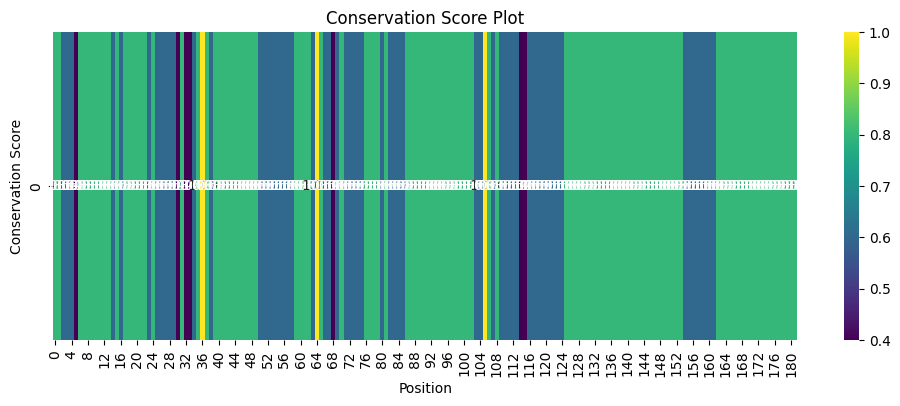

In [8]:
#Plotting the conservation domain plot of the MSA output
from Bio.Align import MultipleSeqAlignment
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#Converting alignment to MultipleSeqAlignment object
msa = MultipleSeqAlignment(alignment)

#Generating and plotting conservation scores
def plot_conservation(msa):
    # Convert alignment to a numpy array
    alignment_matrix = np.array([list(rec.seq) for rec in msa])

    #Calculating column-wise conservation score
    conservation_scores = []
    for col in range(alignment_matrix.shape[1]):
        col_values = alignment_matrix[:, col]
        most_common = Counter(col_values).most_common(1)[0][1]
        conservation_score = most_common / len(col_values)
        conservation_scores.append(conservation_score)

    #Plotting conservation scores as conservation plot
    plt.figure(figsize=(12, 4))
    sns.heatmap([conservation_scores], cmap="viridis", annot=True, fmt=".2f", cbar=True)
    plt.title("Conservation Score Plot")
    plt.xlabel("Position")
    plt.ylabel("Conservation Score")
    plt.show()

plot_conservation(msa)

In [9]:
#Calculating the total number of gaps and similarity witin the MSA
def calculate_alignment_statistics(alignment):
    num_sequences = len(alignment)
    length = alignment.get_alignment_length()

    num_gaps = 0
    num_matches = 0
    num_identical = 0

    for i in range(length):
        column = alignment[:, i]
        num_gaps += column.count('-')
        if len(set(column)) == 1 and '-' not in column:
            num_matches += 1
            if len(set(column)) == 1:
                num_identical += 1

    identity = (num_identical / length) * 100
    similarity = ((num_matches + num_identical) / length) * 100

    return num_gaps, similarity, identity

num_gaps, similarity, identity = calculate_alignment_statistics(alignment)
print(f"Number of gaps: {num_gaps}")
print(f"Similarity: {similarity:.2f}%")
print(f"Identity: {identity:.2f}%")

Number of gaps: 508
Similarity: 3.30%
Identity: 1.65%


In [ ]:
#Performing blast search on multiple database
from Bio.Blast import NCBIWWW, NCBIXML
from tabulate import tabulate
import textwrap

def wrap_text(text, width=50):
    return "\n".join(textwrap.fill(line, width=width) for line in text.splitlines())

def perform_blast_search(user_sequence, database):
    try:
        result_handle = NCBIWWW.qblast("blastp", database, user_sequence)
        if result_handle:
            with result_handle as result:
                blast_record = NCBIXML.read(result)
                if blast_record.alignments:
                    table_data = []
                    for i, alignment in enumerate(blast_record.alignments[:10]):
                        for hsp in alignment.hsps:
                            alignment_data = []
                            alignment_data.append(f"Alignment {i+1}")
                            alignment_data.append(wrap_text(alignment.title))
                            alignment_data.append(alignment.accession)
                            alignment_data.append(wrap_text(hsp.sbjct[:50] + "..."))
                            alignment_data.append(str(hsp.align_length))
                            alignment_data.append(f"{hsp.expect:.2e}")
                            alignment_data.append(f"{hsp.bits:.2f}")

                            percentage_identity = (hsp.identities / hsp.align_length) * 100
                            alignment_data.append(f"{percentage_identity:.2f}%")

                            table_data.append(alignment_data)

                    return table_data
                else:
                    return []
        else:
            return []

    except Exception as e:
        print(f"An error occurred during BLAST search for database {database}: {e}")
        return []

def display_results(results, database_name):
    if results:
        headers = ["Alignment", "Title", "Accession Number", "Subject", "Alignment Length", "E-value", "Bit Score", "Percentage Identity"]
        print(f"\nResults from {database_name}:")
        print(tabulate(results, headers=headers, tablefmt="grid"))
    else:
        print(f"No results found in the {database_name} database.")

def perform_combined_blast_search(user_sequence):
    # Perform searches on both databases
    swissprot_results = perform_blast_search(user_sequence, "swissprot")
    uniprot_results = perform_blast_search(user_sequence, "uniprot")

    # Display results
    display_results(swissprot_results, "SwissProt")
    display_results(uniprot_results, "UniProt")

if __name__ == "__main__":
    user_sequence = input("Enter a protein sequence: ")
    perform_combined_blast_search(user_sequence)